In [33]:
# All Imports
import os
import numpy as np
import pandas as pd

In [35]:
# Importing data raw data set

# Adapt to your directory
# os.chdir('/home/jovyan')
dataSet = pd.read_csv('Spotify_Dataset_V3.csv', delimiter=';')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                         

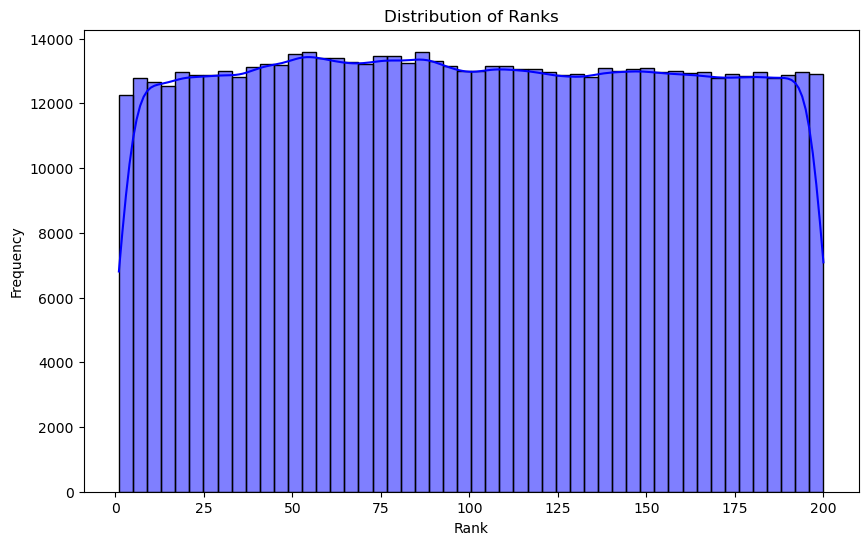

                          id  Highest Rank
0     000xQL6tZNLJzIrtIgxqSl            40
1     003VDDA7J3Xb2ZFlNx7nIZ           108
2     003eoIwxETJujVWmNFMoZy            91
3     003vvx7Niy0yvhvHt4a68B            73
4     00B7TZ0Xawar6NZ00JFomN            61
...                      ...           ...
9156  7zjEyeBsaw9gV0jofJLfOM            97
9157  7zl7kehxesNEo2pYkKXTSe           112
9158  7znO2T2deQ7nZUbyxEAMDB           140
9159  7zvfDihYiJ8RQ1nRcpKBF5            23
9160  7zxRMhXxJMQCeDDg0rKAVo           125

[9161 rows x 2 columns]
Number of unique songs that reached Rank 1: 119


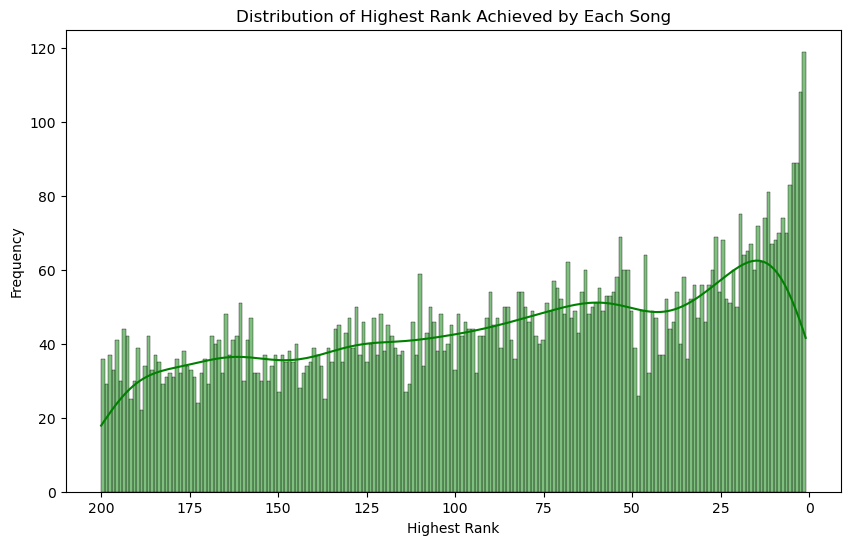

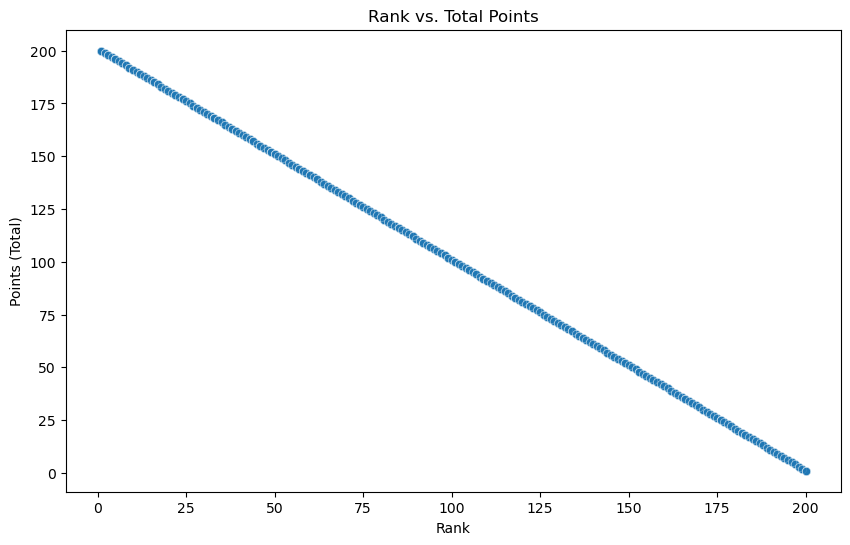

/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_22336/1277049299.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Rank', data=data1, ci=None)


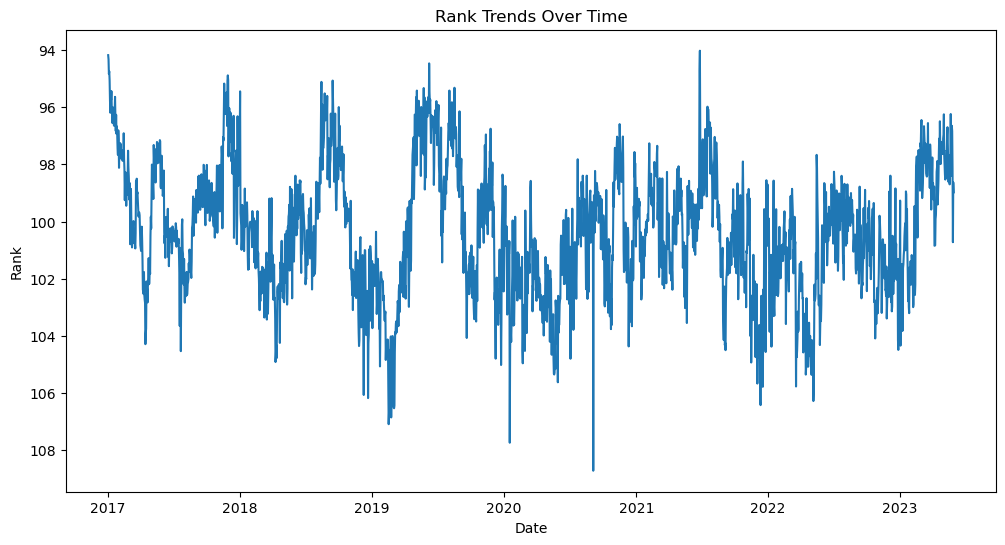

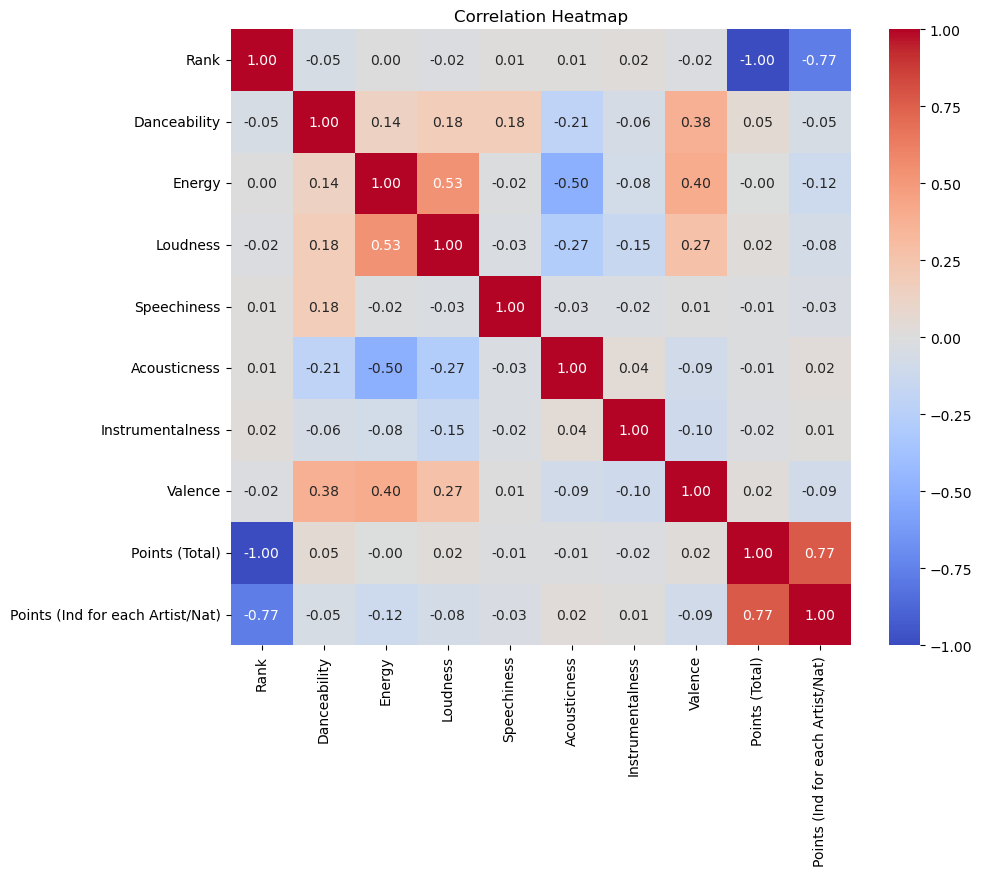

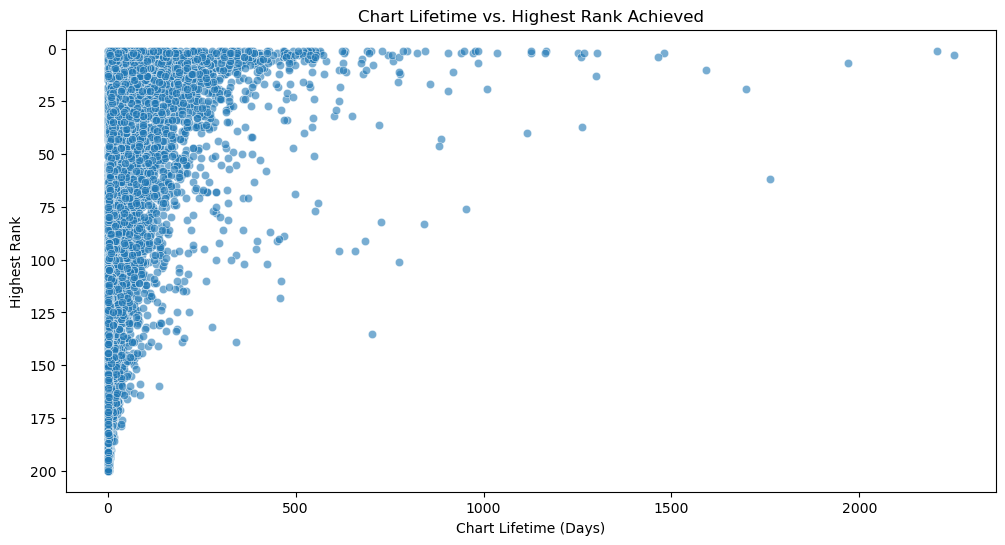

In [37]:
# Part 1: Data Exploration ----------------------------------------------

# Copy of dataset for data exploration
data1 = dataSet.copy()  # This creates a deep copy of dataSet.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format for time-based analysis
data1['Date'] = pd.to_datetime(data1['Date'], format='%d/%m/%Y')

# Check basic info and missing values
print(data1.info())
print("\nMissing Values:")
print(data1.isnull().sum())

# Visualize the distribution of Rank
plt.figure(figsize=(10, 6))
sns.histplot(data1['Rank'], bins=50, kde=True, color='blue')
plt.title("Distribution of Ranks")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

highest_ranks = data1.groupby('id')['Rank'].min().reset_index()
highest_ranks.rename(columns={'Rank': 'Highest Rank'}, inplace=True)

print(highest_ranks)

# Count the number of unique songs that reached Rank 1
top_1_songs = highest_ranks[highest_ranks['Highest Rank'] == 1]
num_top_1_songs = top_1_songs.shape[0]  # Get the number of rows (songs)

# Print the result
print(f"Number of unique songs that reached Rank 1: {num_top_1_songs}")


# Visualize the distribution of the highest rank achieved
plt.figure(figsize=(10, 6))
sns.histplot(highest_ranks['Highest Rank'], bins=200, kde=True, color='green')
plt.title("Distribution of Highest Rank Achieved by Each Song")
plt.xlabel("Highest Rank")
plt.ylabel("Frequency")
plt.gca().invert_xaxis()  # Invert x-axis as lower rank is better
plt.show()

# Visualize the relationship between Rank and Points (Total)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Points (Total)', data=data1, alpha=0.6)
plt.title("Rank vs. Total Points")
plt.xlabel("Rank")
plt.ylabel("Points (Total)")
plt.show()

# Visualize chart life trends over time (using Points or Rank)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Rank', data=data1, ci=None)
plt.gca().invert_yaxis()  # Invert y-axis because lower ranks are better
plt.title("Rank Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Rank")
plt.show()

# Correlation heatmap for numerical columns
numerical_cols = ['Rank', 'Danceability', 'Energy', 'Loudness', 
                  'Speechiness', 'Acousticness', 'Instrumentalness', 
                  'Valence', 'Points (Total)', 'Points (Ind for each Artist/Nat)']
plt.figure(figsize=(10, 8))
sns.heatmap(data1[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 1: Calculate Chart Lifetime (Number of unique appearances per day)
chart_lifetime = data1.groupby(['id', 'Date']).size().reset_index(name='Appearances per Day')

# Step 2: Calculate the number of unique days each song appeared
song_lifetime = chart_lifetime.groupby('id')['Date'].nunique().reset_index(name='Chart Lifetime (Days)')

# Merge the lifetime information with the highest ranks data
song_lifetime_and_rank = pd.merge(highest_ranks, song_lifetime, on='id', how='left')

# Step 3: Visualize the relationship between Rank and Chart Lifetime
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chart Lifetime (Days)', y='Highest Rank', data=song_lifetime_and_rank, alpha=0.6)
plt.title("Chart Lifetime vs. Highest Rank Achieved")
plt.xlabel("Chart Lifetime (Days)")
plt.ylabel("Highest Rank")
plt.gca().invert_yaxis()  # Invert y-axis because lower ranks are better
plt.show()

In [38]:


# Copy of dataset for data exploration
data1 = dataSet.copy()  # This creates a deep copy of dataSet.



# Convert 'Date' to datetime format for time-based analysis
data1['Date'] = pd.to_datetime(data1['Date'], format='%d/%m/%Y')

# Check basic info and missing values
print(data1.info())
print("\nMissing Values:")
print(data1.isnull().sum())



# Copy of dataset for data exploration
data1 = dataSet.copy()  # This creates a deep copy of dataSet.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format for time-based analysis
data1['Date'] = pd.to_datetime(data1['Date'], format='%d/%m/%Y')

# Check basic info and missing values
print(data1.info())
print("\nMissing Values:")
print(data1.isnull().sum())

# Step 1: Calculate Chart Lifetime (Number of unique appearances per day)
chart_lifetime = data1.groupby(['id', 'Date']).size().reset_index(name='Appearances per Day')

# Step 2: Calculate the number of unique days each song appeared
song_lifetime = chart_lifetime.groupby('id')['Date'].nunique().reset_index(name='Chart Lifetime (Days)')

# Merge the lifetime information with the highest ranks data
highest_ranks = data1.groupby('id')['Rank'].min().reset_index()
highest_ranks.rename(columns={'Rank': 'Highest Rank'}, inplace=True)
song_lifetime_and_rank = pd.merge(highest_ranks, song_lifetime, on='id', how='left')

# Check that 'Rank' and 'Chart Lifetime (Days)' are in the merged dataframe
print("\nCheck columns in song_lifetime_and_rank:")
print(song_lifetime_and_rank.columns)


# Ensure 'Rank' and 'Chart Lifetime (Days)' columns are present before proceeding
if 'Rank' in song_lifetime_and_rank.columns and 'Chart Lifetime (Days)' in song_lifetime_and_rank.columns:
    # Normalization: Scale the 'Rank' and 'Chart Lifetime (Days)' to a common range
    from sklearn.preprocessing import MinMaxScaler
    
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Apply normalization to the 'Rank' and 'Chart Lifetime (Days)' columns
    song_lifetime_and_rank[['Rank', 'Chart Lifetime (Days)']] = scaler.fit_transform(song_lifetime_and_rank[['Rank', 'Chart Lifetime (Days)']])
    
    # Outlier Removal: Remove rows with extreme outliers based on Z-scores
    from scipy.stats import zscore

    # Calculate Z-scores for 'Rank' and 'Chart Lifetime (Days)'
    song_lifetime_and_rank['z_score_rank'] = zscore(song_lifetime_and_rank['Rank'])
    song_lifetime_and_rank['z_score_life'] = zscore(song_lifetime_and_rank['Chart Lifetime (Days)'])

    # Define a threshold for outlier detection (Z-score > 3 indicates outlier)
    song_lifetime_and_rank_cleaned = song_lifetime_and_rank[(song_lifetime_and_rank['z_score_rank'].abs() <= 3) & 
                                                           (song_lifetime_and_rank['z_score_life'].abs() <= 3)]

    # Drop the Z-score columns after cleaning
    song_lifetime_and_rank_cleaned = song_lifetime_and_rank_cleaned.drop(columns=['z_score_rank', 'z_score_life'])

    # Summary of cleaned dataset after normalization and outlier removal
    print("\nCleaned Dataset after Normalization and Outlier Removal:")
    print(song_lifetime_and_rank_cleaned.info())
else:
    print("'Rank' or 'Chart Lifetime (Days)' column is missing. Please check earlier calculations.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                         

In [42]:
# Part 2: Data Cleaning ----------------------------------------------

# Handle missing values
# Example: Drop rows where Rank or Points (Total) is missing
data1 = data1.dropna(subset=['Rank', 'Points (Total)'])

# Handle outliers
# Example: Remove ranks or points beyond reasonable thresholds
rank_threshold = 200  # Assuming the Top 200 chart
data1 = data1[data1['Rank'] <= rank_threshold]

# Feature Engineering: Rank bins
# Divide Rank into categories (e.g., bins of 20)
rank_bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
rank_labels = [f"{i}-{i+20}" for i in range(0, 200, 20)]
data1['Rank Bin'] = pd.cut(data1['Rank'], bins=rank_bins, labels=rank_labels, right=False)

# Feature Engineering: Chart Life (lifetime of a song on chart)
# Assume each song ID is unique, and 'Points (Total)' can reflect chart life indirectly
chart_life = data1.groupby('id').size().reset_index(name='Chart Life (Weeks)')
data1 = data1.merge(chart_life, on='id', how='left')

# Summary of cleaned dataset
print("\nCleaned Dataset Overview:")
print(data1.info())



Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valen

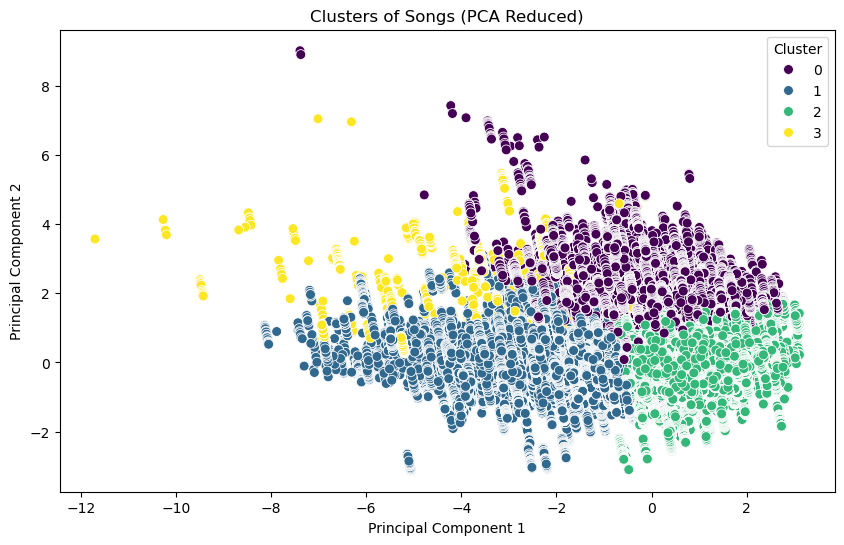

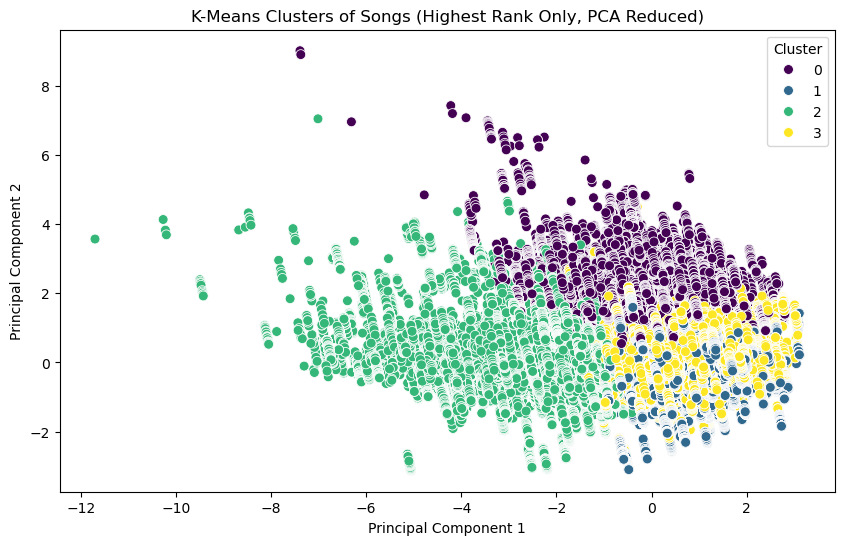

In [44]:
# Part 3: Unsupervised Learning ----------------------------------------------

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for clustering
cluster_features = ['Danceability', 'Energy', 'Loudness', 
                    'Speechiness', 'Acousticness', 'Instrumentalness', 
                    'Valence', 'Points (Total)', 'Chart Life (Weeks)']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1[cluster_features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data1['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters (Using PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data1['Cluster'], palette='viridis', s=50)
plt.title("Clusters of Songs (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


# Calculate the highest rank achieved by each song
highest_ranks = data1.groupby('id')['Rank'].min().reset_index()
highest_ranks.rename(columns={'Rank': 'Highest Rank'}, inplace=True)

# Merge the highest rank back with the other features
highest_rank_data = highest_ranks.merge(data1, on='id', how='left')

# Now apply clustering to only the highest rank rows
scaled_features = scaler.fit_transform(highest_rank_data[cluster_features])
kmeans = KMeans(n_clusters=4, random_state=42)
highest_rank_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clustering based on highest rank
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=highest_rank_data['Cluster'], palette='viridis', s=50)
plt.title("K-Means Clusters of Songs (Highest Rank Only, PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


Linear Regression Results:
Mean Squared Error: 3440.2159221285738
Root Mean Squared Error: 58.65335388644518
R-squared: 0.005189353349633552

Random Forest Regressor Results:
Mean Squared Error: 3526.978227840899
Root Mean Squared Error: 59.38836778225934
R-squared: -0.019899788554328834


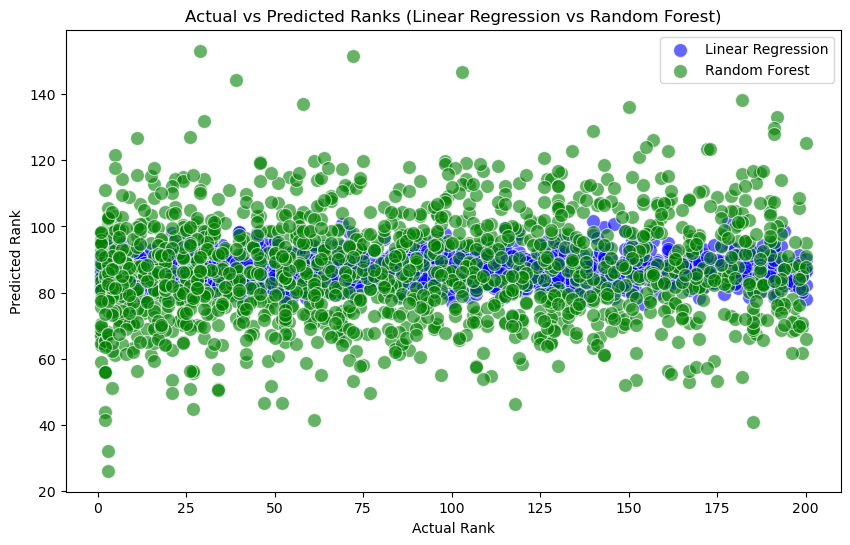

/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_22336/3534282981.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


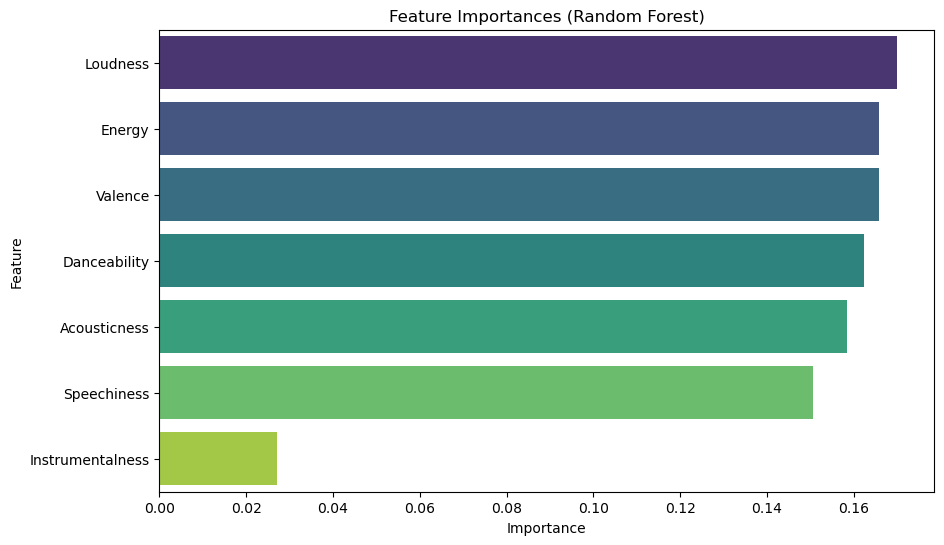

In [45]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Copy of dataset for supervised use
data3 = dataSet.copy()  # This creates a deep copy of dataSet.

# Select relevant features (excluding 'Points (Total)' as it directly correlates with 'Rank')
features = ['Danceability', 'Energy', 'Loudness', 
            'Speechiness', 'Acousticness', 'Instrumentalness', 
            'Valence']  # You can add or remove features based on domain knowledge

# Define the target variable (predicting 'Rank')
target = 'Rank'

#data3 = data3.groupby('id')['Rank'].min().reset_index()
data3 = data3.sort_values(by='Rank', ascending=True)  # Assuming ascending order means highest rank is the first row
data3 = data3.drop_duplicates(subset='Title', keep='first')

# Prepare the data
X = data3[features]

y = data3[target]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for many models, especially linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Option 1: Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the model (Linear Regression)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"R-squared: {r2_lr}")

# Option 2: Train a Random Forest Regressor model (useful for capturing non-linear relationships)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the model (Random Forest)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

# Visualization: Comparing actual vs predicted ranks
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, label="Linear Regression", color='blue', s=100, alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", color='green', s=100, alpha=0.6)
plt.title("Actual vs Predicted Ranks (Linear Regression vs Random Forest)")
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.legend()
plt.show()

# Additional Visualizations: Feature Importance (For Random Forest and XGBoost)
# Random Forest Feature Importance
feature_importances = model_rf.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.show()


Linear Regression Results with Artist Weight:
Mean Squared Error: 2547.5408746013413
Root Mean Squared Error: 50.47316984895382
R-squared: 0.2633250812750342

Random Forest Regressor Results with Artist Weight:
Mean Squared Error: 2502.8516534389364
Root Mean Squared Error: 50.02850840709661
R-squared: 0.27624790763512086


/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_22336/397587524.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


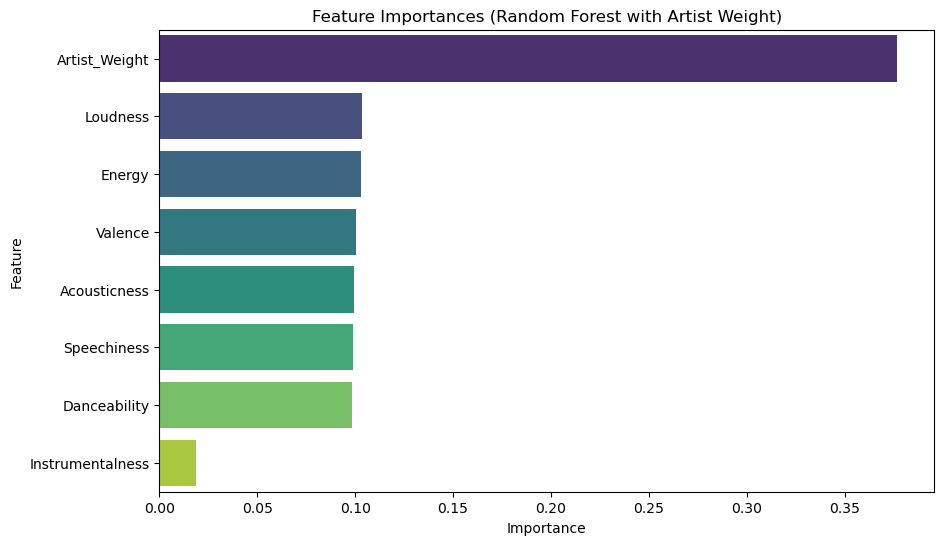

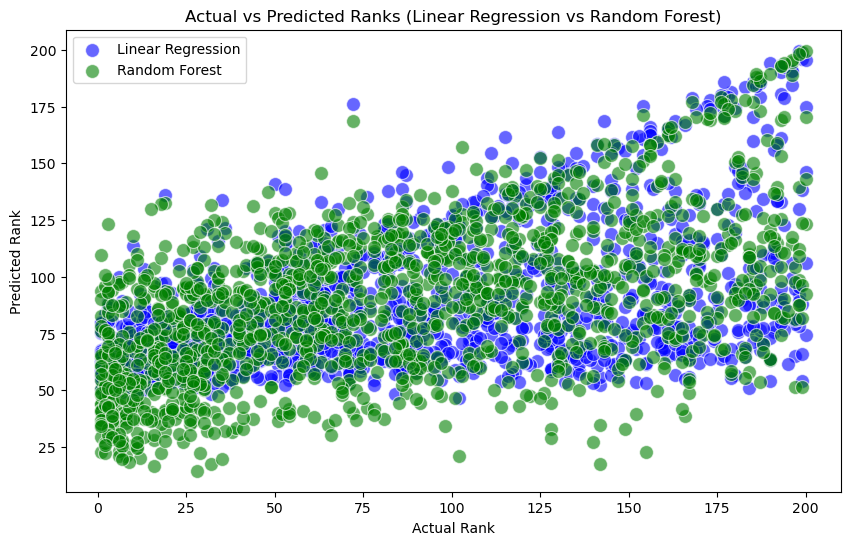

In [46]:
data3 = dataSet.copy()

# Calculate the highest rank achieved by each song
highest_ranks = data1.groupby('id')['Rank'].min().reset_index()
highest_ranks.rename(columns={'Rank': 'Highest Rank'}, inplace=True)

# Merge the highest rank back with the other features
data3 = highest_ranks.merge(data3, on='id', how='left')


# Step 1: Calculate Artist Weight
artist_weight = data3.groupby('Artist (Ind.)')['Highest Rank'].mean().reset_index()
artist_weight.rename(columns={'Highest Rank': 'Artist_Weight'}, inplace=True)

# Step 2: Merge the Artist Weight back into the dataset
data3 = data3.merge(artist_weight, on='Artist (Ind.)', how='left')

# Step 3: Update the features to include 'Artist_Weight'
features = ['Danceability', 'Energy', 'Loudness', 
            'Speechiness', 'Acousticness', 'Instrumentalness', 
            'Valence', 'Artist_Weight']  # Include Artist_Weight as a feature

# Prepare the data
data3 = data3.sort_values(by='Rank', ascending=True)  # Assuming ascending order means highest rank is the first row
data3 = data3.drop_duplicates(subset='Title', keep='first')

X = data3[features]

y = data3[target]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for many models, especially linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models (reuse the code for Linear Regression and Random Forest)
# Option 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results with Artist Weight:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"R-squared: {r2_lr}")

# Option 2: Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Results with Artist Weight:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

# Visualization: Feature Importance (For Random Forest)
feature_importances = model_rf.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importances (Random Forest with Artist Weight)")
plt.show()

# Visualization: Comparing actual vs predicted ranks
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, label="Linear Regression", color='blue', s=100, alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", color='green', s=100, alpha=0.6)
plt.title("Actual vs Predicted Ranks (Linear Regression vs Random Forest)")
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.legend()
plt.show()


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.41      0.65      0.50       264
           1       0.67      0.02      0.03       258
           2       0.23      0.11      0.15       383
           3       0.51      0.77      0.61       587

    accuracy                           0.45      1492
   macro avg       0.45      0.38      0.32      1492
weighted avg       0.45      0.45      0.37      1492


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.43      0.48      0.46       264
           1       0.25      0.14      0.18       258
           2       0.32      0.26      0.28       383
           3       0.53      0.68      0.60       587

    accuracy                           0.44      1492
   macro avg       0.38      0.39      0.38      1492
weighted avg       0.41      0.44      0.42      1492



/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_22336/1645153863.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


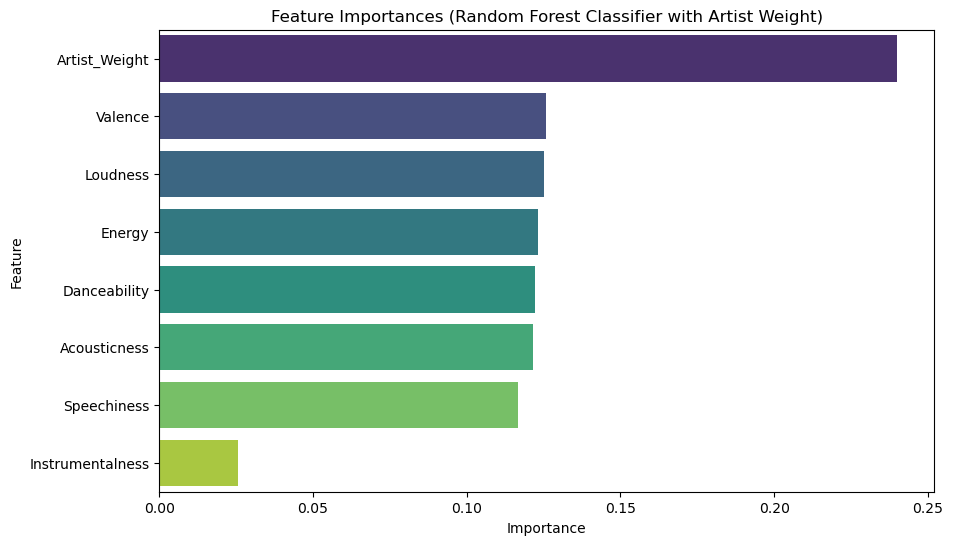

<Figure size 1000x600 with 0 Axes>

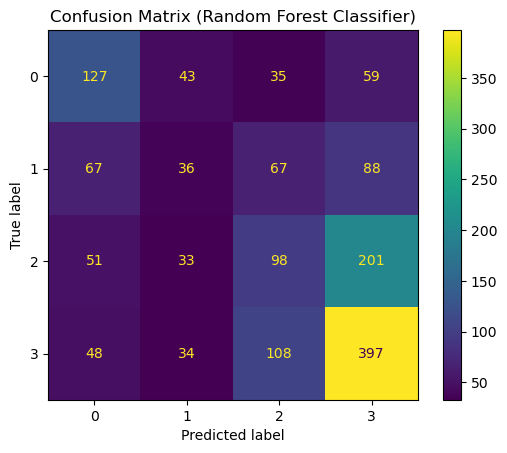

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Bin the target variable into categories
bin_edges = [0, 20, 50, 100, 200]  # Define bins (e.g., Top 10, 11–50, etc.)
bin_labels = [0, 1, 2, 3]          # Assign labels for bins
data3['Rank_Bin'] = pd.cut(data3['Rank'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Step 2: Update the target variable for classification
y = data3['Rank_Bin']

# Step 3: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Option 1: Logistic Regression
model_logreg = LogisticRegression(max_iter=500, random_state=42)
model_logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = model_logreg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))

# Option 2: Random Forest Classifier
model_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf_clf = model_rf_clf.predict(X_test_scaled)

# Evaluate the Random Forest Classifier
print("\nRandom Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf_clf))

# Step 4: Feature Importances (For Random Forest)
feature_importances = model_rf_clf.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importances (Random Forest Classifier with Artist Weight)")
plt.show()

# Visualization: Confusion Matrix for Random Forest Classifier
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(model_rf_clf, X_test_scaled, y_test, cmap="viridis")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()


In [52]:
data3 = dataSet.copy()

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.41      0.65      0.50       264
           1       0.67      0.02      0.03       258
           2       0.23      0.11      0.15       383
           3       0.51      0.77      0.61       587

    accuracy                           0.45      1492
   macro avg       0.45      0.38      0.32      1492
weighted avg       0.45      0.45      0.37      1492


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.43      0.48      0.46       264
           1       0.25      0.14      0.18       258
           2       0.32      0.26      0.28       383
           3       0.53      0.68      0.60       587

    accuracy                           0.44      1492
   macro avg       0.38      0.39      0.38      1492
weighted avg       0.41      0.44      0.42      1492


Support Vector Machine Results:
              precision    recall

/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_22336/4126964777.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df_rf, palette='viridis')


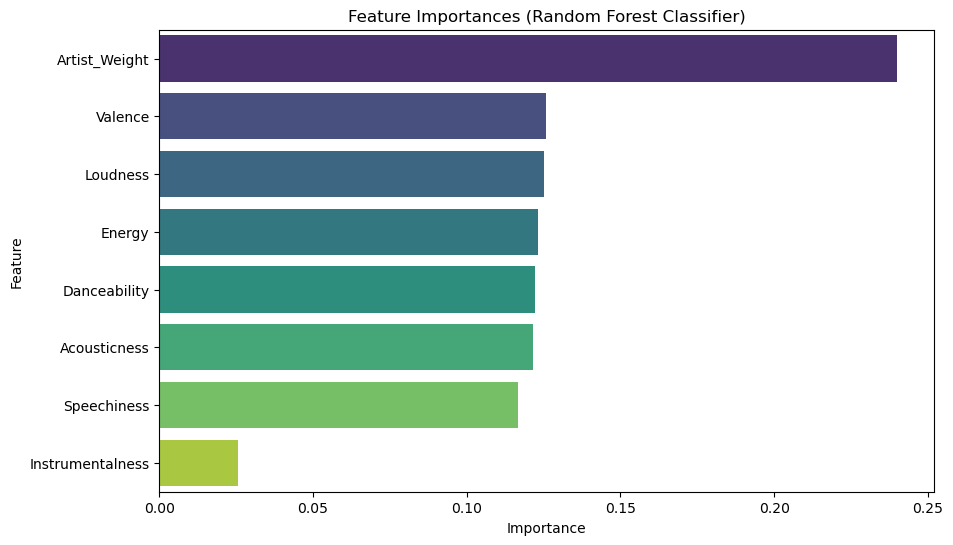

/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_22336/4126964777.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df_gb, palette='viridis')


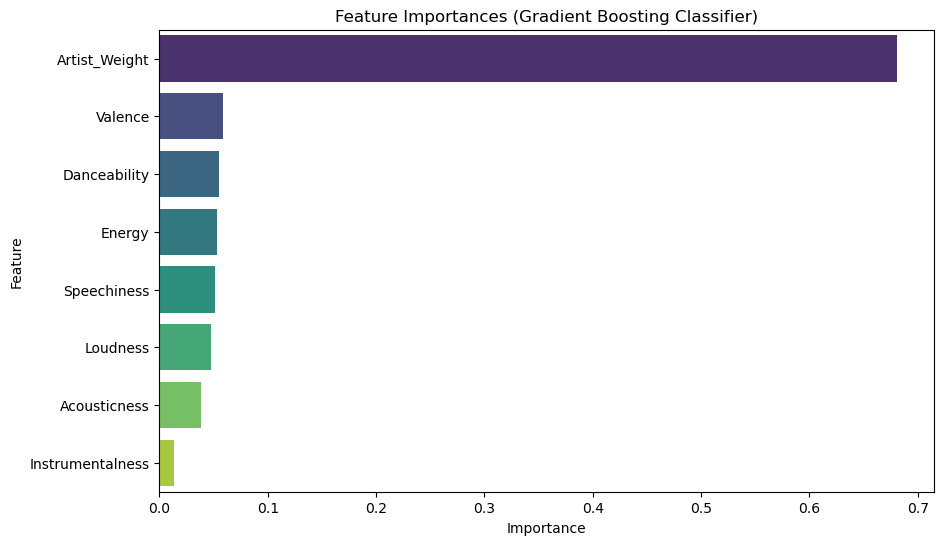

<Figure size 1000x600 with 0 Axes>

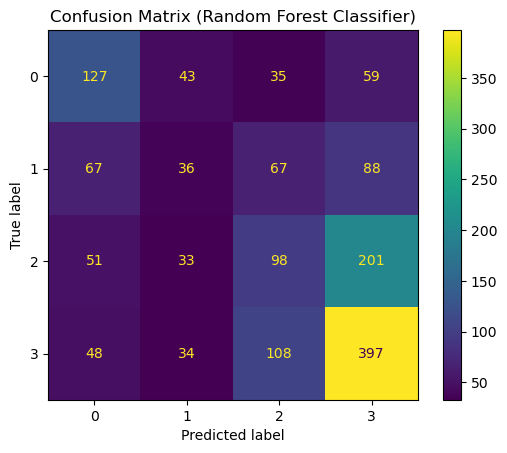

<Figure size 1000x600 with 0 Axes>

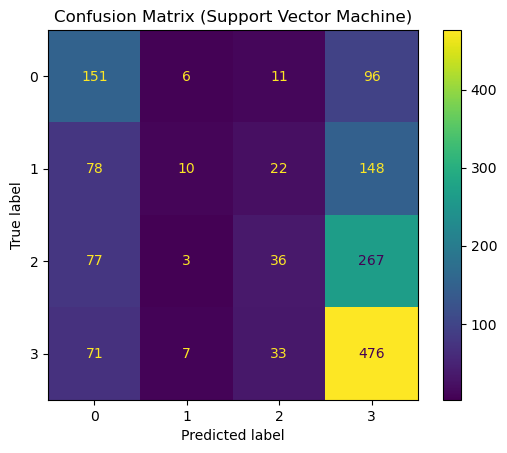

<Figure size 1000x600 with 0 Axes>

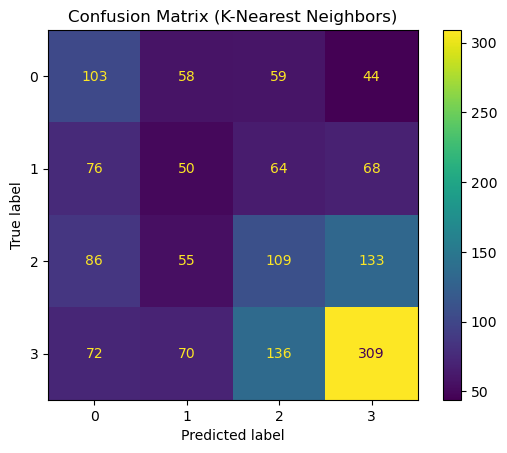

<Figure size 1000x600 with 0 Axes>

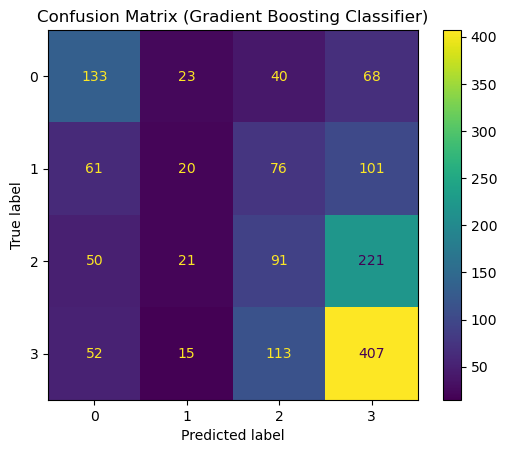

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Bin the target variable into categories
data3 = dataSet.copy()

# Calculate the highest rank achieved by each song
highest_ranks = data1.groupby('id')['Rank'].min().reset_index()
highest_ranks.rename(columns={'Rank': 'Highest Rank'}, inplace=True)

# Merge the highest rank back with the other features
data3 = highest_ranks.merge(data3, on='id', how='left')


# Step 1: Calculate Artist Weight
artist_weight = data3.groupby('Artist (Ind.)')['Highest Rank'].mean().reset_index()
artist_weight.rename(columns={'Highest Rank': 'Artist_Weight'}, inplace=True)

# Step 2: Merge the Artist Weight back into the dataset
data3 = data3.merge(artist_weight, on='Artist (Ind.)', how='left')

# Step 3: Update the features to include 'Artist_Weight'
features = ['Danceability', 'Energy', 'Loudness', 
            'Speechiness', 'Acousticness', 'Instrumentalness', 
            'Valence', 'Artist_Weight']  # Include Artist_Weight as a feature

# Prepare the data
data3 = data3.sort_values(by='Rank', ascending=True)  # Assuming ascending order means highest rank is the first row
data3 = data3.drop_duplicates(subset='Title', keep='first')

X = data3[features]

# Step 1: Bin the target variable into categories
bin_edges = [0, 20, 50, 100, 200]  # Define bins (e.g., Top 10, 11–50, etc.)
bin_labels = [0, 1, 2, 3]          # Assign labels for bins
data3['Rank_Bin'] = pd.cut(data3['Rank'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Step 2: Update the target variable for classification
y = data3['Rank_Bin']


# Step 3: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Option 1: Logistic Regression
model_logreg = LogisticRegression(max_iter=500, random_state=42)
model_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = model_logreg.predict(X_test_scaled)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))

# Option 2: Random Forest Classifier
model_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_clf.fit(X_train_scaled, y_train)
y_pred_rf_clf = model_rf_clf.predict(X_test_scaled)
print("\nRandom Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf_clf))

# Option 3: Support Vector Machine (SVM)
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
print("\nSupport Vector Machine Results:")
print(classification_report(y_test, y_pred_svm))

# Option 4: K-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print("\nK-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred_knn))

# Option 5: Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)
print("\nGradient Boosting Classifier Results:")
print(classification_report(y_test, y_pred_gb))



# Step 4: Feature Importances (For Random Forest and Gradient Boosting)
# Feature importance for Random Forest
feature_importances_rf = model_rf_clf.feature_importances_
feature_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
feature_df_rf = feature_df_rf.sort_values(by='Importance', ascending=False)

# Plot Feature Importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df_rf, palette='viridis')
plt.title("Feature Importances (Random Forest Classifier)")
plt.show()

# Feature importance for Gradient Boosting
feature_importances_gb = model_gb.feature_importances_
feature_df_gb = pd.DataFrame({'Feature': features, 'Importance': feature_importances_gb})
feature_df_gb = feature_df_gb.sort_values(by='Importance', ascending=False)

# Plot Feature Importances for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df_gb, palette='viridis')
plt.title("Feature Importances (Gradient Boosting Classifier)")
plt.show()

# Step 5: Visualization: Confusion Matrix for Random Forest Classifier (and others)
# Random Forest Confusion Matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(model_rf_clf, X_test_scaled, y_test, cmap="viridis")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

# SVM Confusion Matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(model_svm, X_test_scaled, y_test, cmap="viridis")
plt.title("Confusion Matrix (Support Vector Machine)")
plt.show()

# KNN Confusion Matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(model_knn, X_test_scaled, y_test, cmap="viridis")
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.show()

# Gradient Boosting Confusion Matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(model_gb, X_test_scaled, y_test, cmap="viridis")
plt.title("Confusion Matrix (Gradient Boosting Classifier)")
plt.show()



